<a href="https://colab.research.google.com/github/Emannuel-A/Bank-Customer-Churn---Analysis/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO DE ANÁLISE EM UM DATASET DE UM BANCO

###INTRODUÇÃO

- Esta análise busca identificar o perfil de clientes que deram churn

Link do dataset:
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset


## CARREGANDO AS BIBLIOTECAS

In [8]:
# Manipulação de dados
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter


# Análise exploratória
import matplotlib.pyplot as plt
import seaborn as sns

# Sistema
import os

# Pre-configs

plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

# CARREGANDO O DATASET

In [21]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# INÍCIO DA EDA

In [22]:
# verificação dos valor unicos por colunas
# analise de distribuição dos clientes por idade, genero, país, membro ativo, salario, saldo em conta, churn
# analise de distribuição em grupos saláriais
# analise de distribuição de score


df.nunique().sort_values(ascending=False)

,0
customer_id,10000
estimated_salary,9999
balance,6382
credit_score,460
age,70
tenure,11
products_number,4
country,3
gender,2
credit_card,2


### Análise da Distribuição de Idade

In [41]:
# análise de distribuição por idade
df['age'].describe()

,age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


In [42]:
# sobre as idades, sempre importante verificar a extensão do banco
print("Min age:", df['age'].min())
print("Max age:", df['age'].max())

Min age: 18
Max age: 92


In [44]:
# Vou fazer uma visão geral sobre as idades dos Clientes
df['age'].describe()

,age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


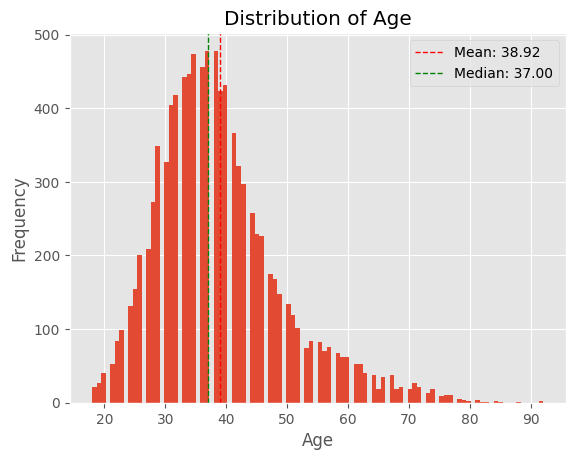

In [47]:
#Vamos olhar agora visualmente como está a distribuição dos valores das idades

plt.hist(df['age'], bins=100)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate mean and median
mean_age = df['age'].mean()
median_age = df['age'].median()

# Agora, para melhorar a vizualização, adicionei duas linhas para identificar a média e a mediana
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_age:.2f}')

plt.legend()
plt.show()

O histograma da distribuição de idade dos clientes mostra uma distribuição aproximadamente normal, com a maioria dos clientes concentrada em torno da média e da mediana. A média das idades está em aproximadamente **39** anos e a mediana em **37** anos, indicando que o centro da distribuição está na faixa dos 30 a 40 anos.

A forma da distribuição parece ser ligeiramente assimétrica à direita (positivamente assimétrica), com uma cauda se estendendo para idades mais altas, embora a maior concentração de clientes esteja na faixa-etária mais jovem. A presença de alguns clientes com idades mais elevadas (visíveis na cauda direita do histograma) indica uma variabilidade na faixa etária dos clientes.

Ou seja, os clientes do banco estão entre os mais jovem a de meia-idade, o que pode ser um fator importante a ser considerado em análises futuras, especialmente ao investigar o perfil de clientes que cancelaram suas contas(churn).

## Distribuição dos Clientes por país

In [36]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts['relativ'] = country_counts['count'] / country_counts['count'].sum()
print("Count of customers per country:")
print(country_counts)

Count of customers per country:
   country  count  relativ
0   France   5014   0.5014
1  Germany   2509   0.2509
2    Spain   2477   0.2477


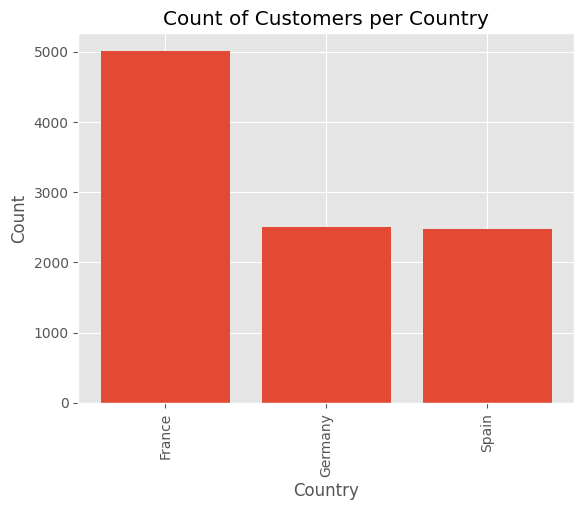

In [48]:
plt.bar(country_counts['country'], country_counts['count'])
plt.title('Count of Customers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Como pode-se notar, pouco mais de 50% dos clientes da base do banco estão na França, enquanto Alemanha e Espanha tem a quantidade relativamente igual de clientes.

## Distribuição por Genênro

In [37]:
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts['relativ'] = gender_counts['count'] / gender_counts['count'].sum()
print("Count of customers per gender:")
print(gender_counts)

Count of customers per gender:
   gender  count  relativ
0    Male   5457   0.5457
1  Female   4543   0.4543


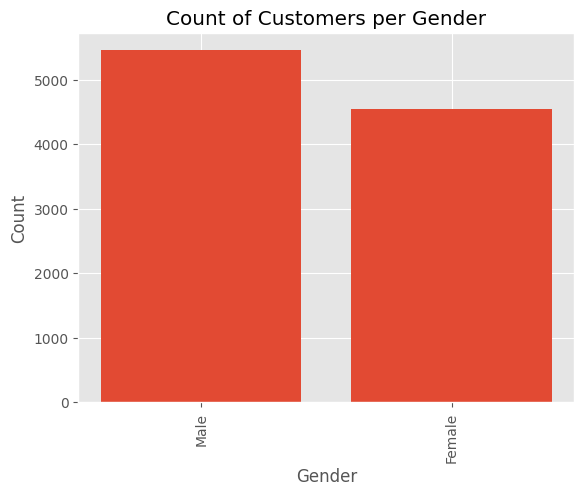

In [49]:
plt.bar(gender_counts['gender'], gender_counts['count'])
plt.title('Count of Customers per Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

54% dos clientes são do genêro masculino, um dado interessante, pois segundo o site https://countrymeters.info/pt/Europe a população europeia se divide em População masculina atual (48.2%) População feminina atual (51.8%)(estimativa 2025), o que mostra uma ligeira discrepancia com a estimativa populacional.

### Clientes ativo/inativos

In [51]:
# Quantidade de Membros ativos
df['active_member'].value_counts()

,count
active_member,
1,5151
0,4849


# Perfil Salarial

In [53]:
# Pra entender melhor o perfil de clientes, vamos agrupar por estimated_salary
display(df['estimated_salary'].describe())

,estimated_salary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


In [60]:
# Criei ranges de salários usando como base o numero de clientes nessa amostras, que é igual a 10k, ou seja
# 4 grupos de 2500 pessoas,
df['salary_range'] = pd.qcut(df['estimated_salary'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# agora mostro como ficou o agrupamento de maneira mais fácil
print("\nCounts of customers in each salary range:")
display(df['salary_range'].value_counts())


Counts of customers in each salary range:


,count
salary_range,
Q1,2500
Q2,2500
Q3,2500
Q4,2500


In [64]:
# Mostrando na prática como ficou a distribuição, para entedermos melhor.
salary_range_stats = df.groupby('salary_range')['estimated_salary'].agg(['min', 'max', 'mean'])
salary_range_stats.columns = ['Min Salary', 'Max Salary', 'Mean Salary']
print("Estimated Salary Statistics per Salary Range:")
display(salary_range_stats)

Estimated Salary Statistics per Salary Range:


/tmp/ipython-input-3904265011.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_range_stats = df.groupby('salary_range')['estimated_salary'].agg(['min', 'max', 'mean'])


,Min Salary,Max Salary,Mean Salary
salary_range,,,
Q1,11.58,50974.57,25407.102916
Q2,51011.29,100187.43,75420.523720
Q3,100200.40,149384.43,124553.795324
Q4,149399.70,199992.48,174979.537564


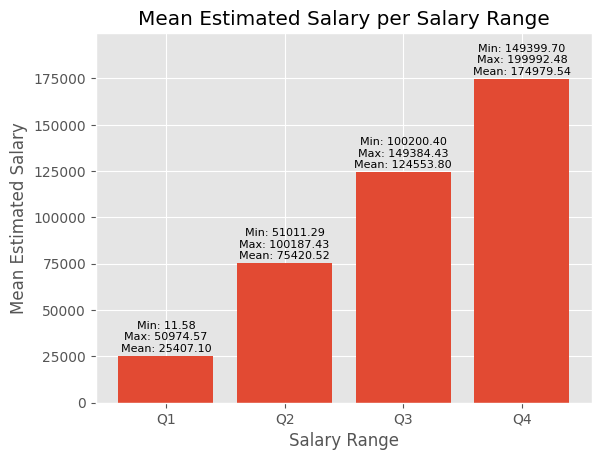

In [73]:
# agora para facilitar o entendimento, vamos vizualizar com um gráfico
plt.bar(salary_range_stats.index, salary_range_stats['Mean Salary'])
plt.title('Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Mean Estimated Salary')

# Para ter uma vizualização rápida adicionei o min, max e média no topo das barras.
for i, row in salary_range_stats.iterrows():
    min_salary = row['Min Salary']
    max_salary = row['Max Salary']
    mean_salary = row['Mean Salary']
    plt.text(i, mean_salary + 1000,
             f'Min: {min_salary:.2f}\nMax: {max_salary:.2f}\nMean: {mean_salary:.2f}',
             ha='center', va='bottom', fontsize=8) # Added a small offset and reduced font size
plt.ylim(0, salary_range_stats['Mean Salary'].max() * 1.14)

plt.show()

## Distribuição de salário
A maior grupo de clientes do Banco tem um salário maior que 149 mil euros por ano, ou seja, são clientes que tem um bom poder aquisitivo(De acordo com o Eurostat, em 2023, o salário médio anual ajustado a tempo inteiro por trabalhador variou entre 13 503 euros na Bulgária e 81 064 euros no Luxemburgo, com a média da UE a situar-se em 37 863 euros. link: https://pt.euronews.com/business/2024/12/24/classificacao-dos-salarios-medios-na-europa-quais-sao-os-paises-que-pagam-mais), enquanto o menor grupo tem uma média de 25 mil euros/ano.
Podemos fazer análise interessantes cruzando com a questão salárial, como: Qual gênero mais predominate por faixa, qual a media de idade de cada faixa, e posterior a isso, quando formos fazer a analise de churn, saber se existe algum desses grupos que se sobressai.

/tmp/ipython-input-2954167658.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby(['salary_range', 'gender']).size().unstack(fill_value=0)


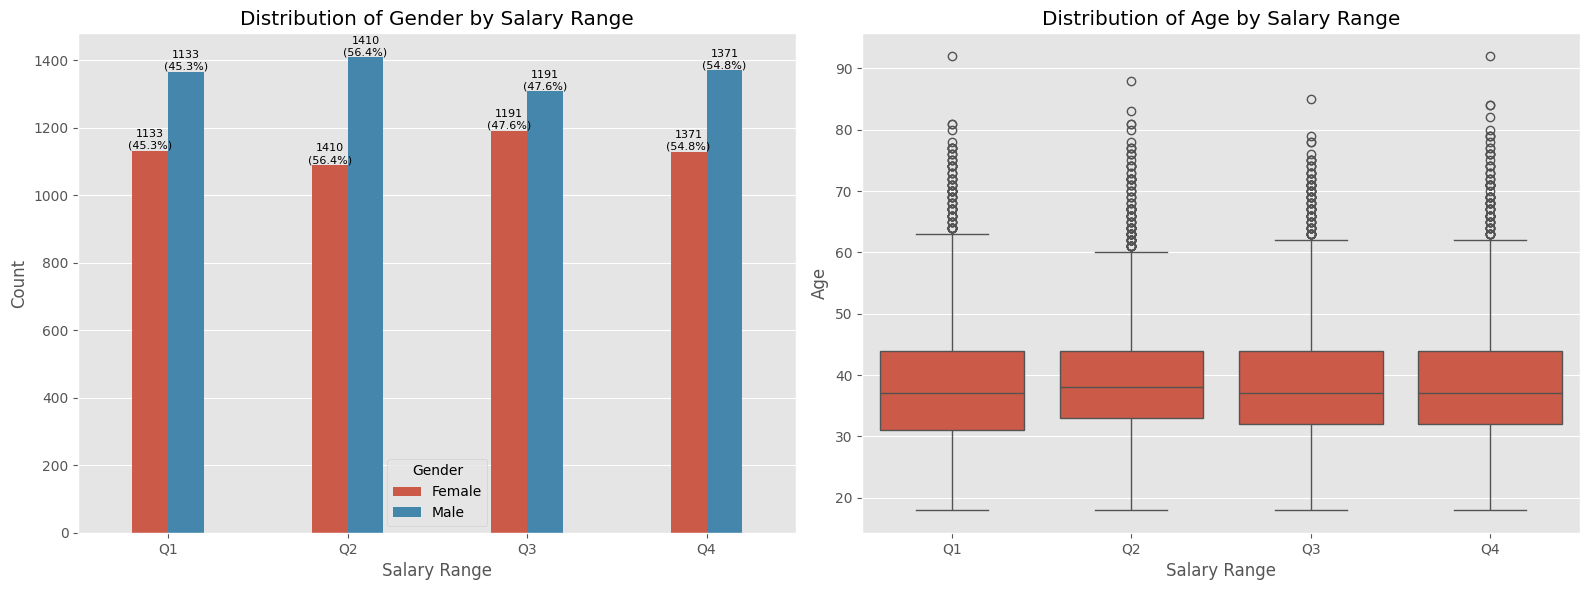

In [129]:
# Vou criar os gráficos para enteder melhor a dritribuição dos salários
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Increased figure size for better text visibility

# Plot 1: Salary Range by Gender
sns.countplot(data=df, x='salary_range', hue='gender', ax=axes[0], width=0.4) # Reduced bar width
axes[0].set_title('Distribution of Gender by Salary Range')
axes[0].set_xlabel('Salary Range')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0) # Keep x-axis labels horizontal
axes[0].legend(title='Gender') # Ensure legend is visible and add a title

gender_counts = df.groupby(['salary_range', 'gender']).size().unstack(fill_value=0)
gender_proportions = gender_counts.apply(lambda x: x / x.sum(), axis=1)

for container in axes[0].containers:
    for i, patch in enumerate(container.patches):
        height = patch.get_height()
        if height > 0:

            salary_range = container.patches[i].get_x() + container.patches[i].get_width() / 2
            gender_index = [j for j, p in enumerate(container.patches) if p == patch][0]
            gender = gender_counts.columns[container.patches.index(patch) % len(gender_counts.columns)] # This might need adjustment based on how hue stacks bars


            salary_range_label = axes[0].get_xticklabels()[int(patch.get_x() + 0.5)].get_text()



            count = gender_counts.loc[salary_range_label, gender]
            proportion = gender_proportions.loc[salary_range_label, gender]

            axes[0].text(patch.get_x() + patch.get_width() / 2., height,
                         f'{count}\n({proportion:.1%})',
                         ha='center', va='bottom', fontsize=8)


# Plot 2: Salary Range by Age (using boxplot to show distribution)
sns.boxplot(data=df, x='salary_range', y='age', ax=axes[1])
axes[1].set_title('Distribution of Age by Salary Range')
axes[1].set_xlabel('Salary Range')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Os gráficos revelam que a distribuição de clientes por Gênero é ligeiramente tendenciosa para o Masculino na maioria das faixas salariais (Q1, Q2, Q4). Crucialmente, a Idade dos clientes é uniformemente distribuída e não se correlaciona com a Faixa Salarial, pois as medianas e dispersões de idade são praticamente idênticas em todos os quartis de salário.

## Vamos olhar a questão do saldo bancário

In [118]:
# vamos verificar os clientes que não tem saldo em conta
print('Quantidade de clientes com saldo 0 é:',(df['balance'] == 0).sum())
print('Quantidade de clientes com saldo positivo > 0 é:',(df['balance'] > 0).sum())
print('Quantidade de clientes com saldo negativo é:',(df['balance'] < 0).sum())
# Agora vamos a média de saldo para os clientes que tem saldo em conta
positive_balance_df = df[df['balance'] > 0]

# Calcula a média do dataframe
mean_positive_balance = positive_balance_df['balance'].mean()
print(f"A média do saldo dos clientes(contando apenas os que tem saldo maior que zero) é: {mean_positive_balance:.2f}")

Quantidade de clientes com saldo 0 é: 3617
Quantidade de clientes com saldo positivo > 0 é: 6383
Quantidade de clientes com saldo negativo é: 0
A média do saldo dos clientes(contando apenas os que tem saldo maior que zero) é: 119827.49


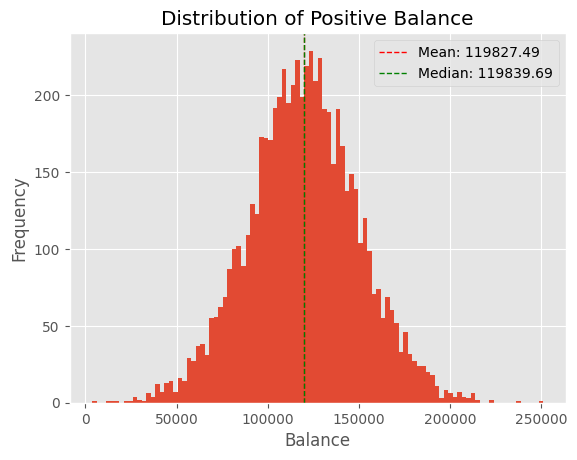

In [107]:
positive_balance_df.hist(column='balance', bins=100)
plt.title('Distribution of Positive Balance') # Changed title for clarity
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Calculate mean and median for positive balances
mean_positive_balance = positive_balance_df['balance'].mean()
median_positive_balance = positive_balance_df['balance'].median()

# Add vertical lines for mean and median
plt.axvline(mean_positive_balance, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_positive_balance:.2f}')
plt.axvline(median_positive_balance, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_positive_balance:.2f}')

plt.legend()
plt.show()

## Distribuição do Saldo Bancário


Podemos notar que as linhas de média e mediana estão praticamento no mesmo lugar, isso indica que o dado está bastante simétrico, em linhas gerais, a distribuição de saldo está equilibrada, não há grandes saldos gigantescos que destoam e elevam a média para cima, lembrando que eu retirei os clientes sem saldo dessa vizualização, para entendermos melhor os clientes que tem dinheiro guardado, mesmo que provisóriamente.

#Análise Multivariada

Agora, que ja exploramos um pouco nosso dataset, entendemos de forma geral o perfil dos clientes, vamos as combinações para uma análise mais profunda dos clientes e entender se há alguma correlação com o churn(lembrando que correlação não implica necessáriamente em causalidade)

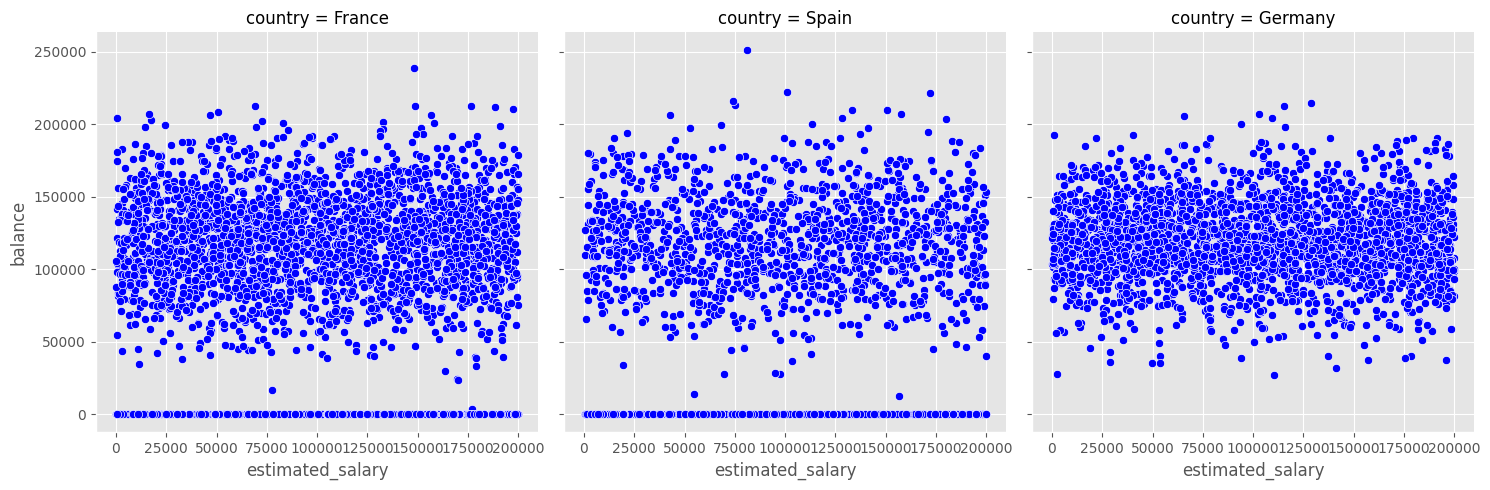

In [110]:
sns.relplot(x = 'estimated_salary', y = 'balance', data = df, col='country', color='b')

É possivel notar que não há relação dodo pais da pessoa com o sua renda.

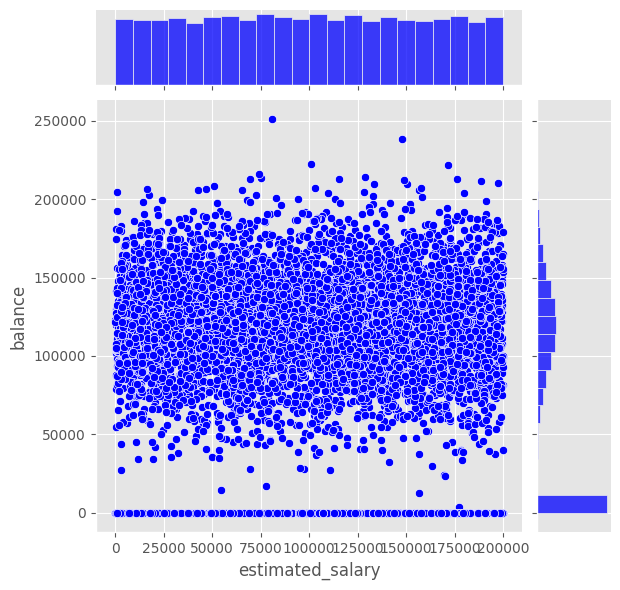

In [130]:
sns.jointplot(x = 'estimated_salary', y = 'balance', data = df, color='b')

Um dado que se mostra intrigante é que não existe uma relação clara entre salário e saldo bancário.

# Análise de Churn

In [117]:
print('Aq quantidade de clientes que deram churn = ', df['churn'].sum())
print('Aq quantidade de clientes que não deram churn = ', (df['churn'] == 0).sum())
print('Porcentagem de clientes que deram churn = ', (df['churn'].sum() / len(df)) * 100,"%")

Aq quantidade de clientes que deram churn =  2037
Aq quantidade de clientes que não deram churn =  7963
Porcentagem de clientes que deram churn =  20.369999999999997 %


**Age vs. Churn (Idade vs. Churn)**:

A mediana (linha central) da idade é visivelmente mais alta para clientes que cancelaram (Churn=1) do que para os que não cancelaram (Churn=0).

O corpo da caixa para Churn=1 também está deslocado para idades mais altas.

**Conclusão:** Clientes mais velhos tendem a ter uma taxa de churn maior.

**Balance vs. Churn (Saldo vs. Churn)**:

A mediana e a distribuição geral do saldo (Balance) são ligeiramente mais altas para clientes que cancelaram (Churn=1), embora as caixas se sobreponham bastante.

**Conclusão:** Clientes com saldo tendem a ter uma taxa de churn um pouco maior, mas a diferença não é tão drástica quanto a idade.

**Credit Score vs. Churn (Pontuação de Crédito vs. Churn):**

As medianas e a distribuição (caixa) das pontuações de crédito são praticamente idênticas para os dois grupos (Churn=0 e Churn=1).

Conclusão: A pontuação de crédito não demonstra ser um fator discriminante significativo de churn.

**Estimated Salary vs. Churn (Salário Estimado vs. Churn):**

As medianas e a distribuição (caixa) dos salários estimados são muito semelhantes para ambos os grupos (Churn=0 e Churn=1).

**Conclusão:** O salário estimado não tem correlação aparente com a taxa de churn.

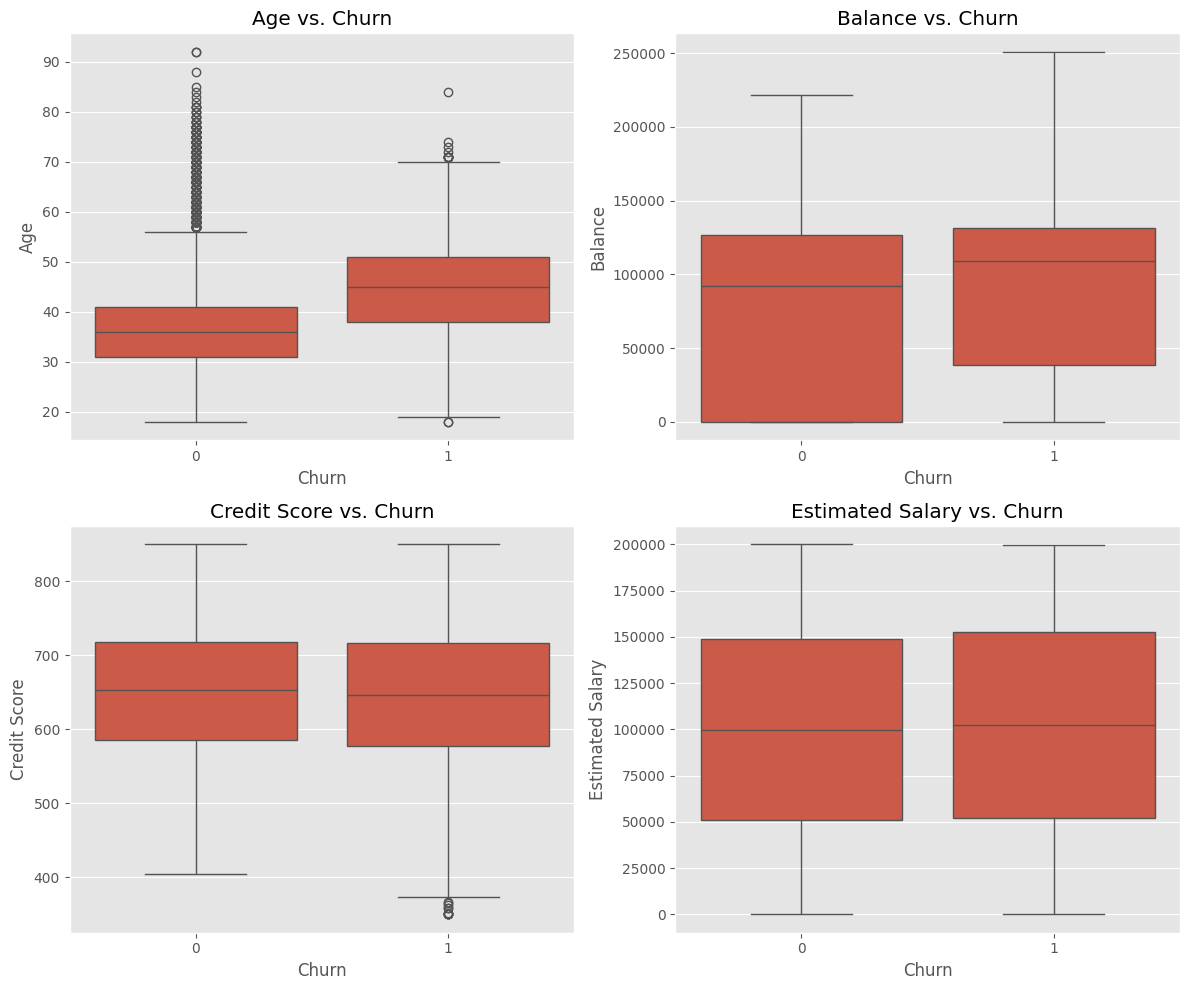

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='churn', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Churn')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Age')

sns.boxplot(x='churn', y='balance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Balance vs. Churn')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Balance')

sns.boxplot(x='churn', y='credit_score', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Credit Score vs. Churn')
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('Credit Score')

sns.boxplot(x='churn', y='estimated_salary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary vs. Churn')
axes[1, 1].set_xlabel('Churn')
axes[1, 1].set_ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

## Em Resumo
A análise dos boxplots sugere que a Idade tem a correlação mais forte com churn, pois a mediana é maior para clientes que cancelaram (1). O Saldo também é ligeiramente maior para o grupo que cancelou. Pontuação de Crédito e Salário Estimado não mostram diferença significativa entre clientes que cancelaram e que não cancelaram.

### Agora vamos continuar a analise por:
Distribution of Country by Churn (Distribuição de País por Churn);
Distribution of Gender by Churn (Distribuição de Gênero por Churn);
Distribution of Active Member by Churn (Distribuição de Membro Ativo por Churn);
Distribution of Products Number by Churn (Distribuição de Número de Produtos por Churn).

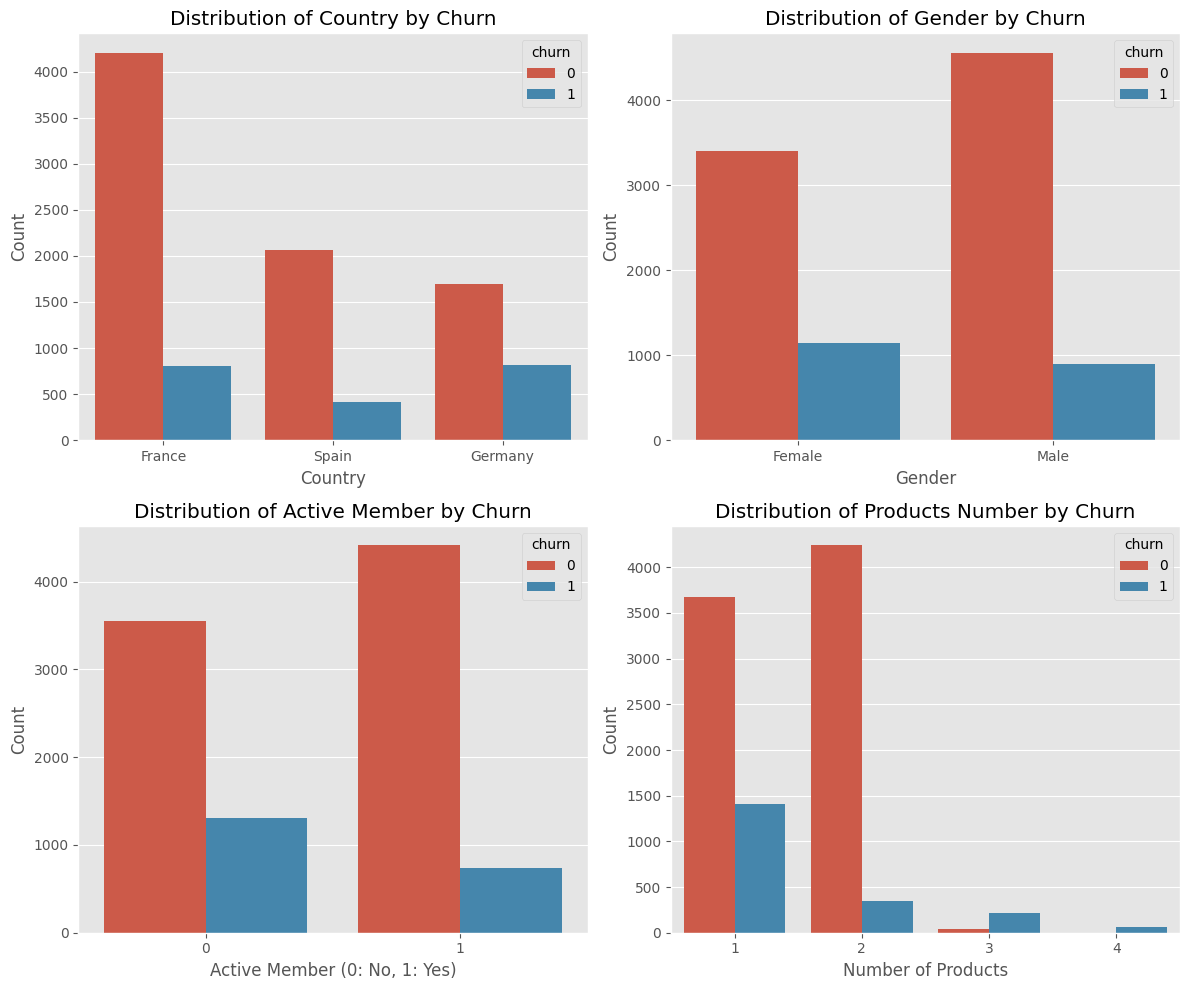

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='country', hue='churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Country by Churn')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='gender', hue='churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Gender by Churn')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='active_member', hue='churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Active Member by Churn')
axes[1, 0].set_xlabel('Active Member (0: No, 1: Yes)')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='products_number', hue='churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Products Number by Churn')
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Analisando os quatro gráficos de barras agrupadas (countplots), que mostram a distribuição de categorias em relação ao Churn (0 = Não Cancelou, 1 = Cancelou):

**Distribution of Country by Churn (Distribuição de País por Churn):**

França tem o maior número total de clientes, mas uma taxa de churn (a proporção da barra azul para a vermelha) relativamente baixa.

Alemanha tem o menor número total de clientes, mas a proporção da barra azul (churn=1) em relação à barra vermelha (churn=0) é notavelmente a mais alta, indicando que a Alemanha tem a maior taxa de churn.

Espanha está no meio, com uma taxa de churn intermediária.

**Distribution of Gender by Churn (Distribuição de Gênero por Churn):**

Embora haja mais clientes do sexo Masculino no total, a proporção de clientes que cancelaram (barra azul) é visivelmente maior para o sexo Feminino do que para o Masculino.

**Conclusão:** Clientes do sexo feminino têm maior probabilidade de churn.

**Distribution of Active Member by Churn (Distribuição de Membro Ativo por Churn):**

Clientes que não são membros ativos (0) têm uma proporção de churn (barra azul) visivelmente maior do que aqueles que são membros ativos (1).

**Conclusão:** Clientes inativos são mais propensos a cancelar.

**Distribution of Products Number by Churn (Distribuição de Número de Produtos por Churn):**

Clientes com 1 ou 2 produtos representam a maioria, e a taxa de churn é baixa a moderada.

Clientes com 3 ou 4 produtos têm uma taxa de churn extremamente alta (a barra azul é quase igual ou maior que a barra vermelha).

**Conclusão:** Ter 3 ou mais produtos está fortemente associado ao churn.

## Principais descobertas

Conclusão: Principais Descobertas e Estratégias de Retenção
A análise de dados de churn revelou padrões claros que diferenciam os clientes que permanecem (não churned) daqueles que cancelam (churned). As descobertas se dividem em fatores numéricos e categóricos:

1. Fatores Numéricos (Boxplots)
Idade é um Fator de Risco: A mediana de idade para clientes que cancelaram é notavelmente mais alta, indicando que a população mais velha possui uma maior propensão ao churn.

Saldo na Conta: Clientes com saldo tendem a ter uma taxa de churn maior em comparação com aqueles sem saldo.

Fatores Irrelevantes: A Pontuação de Crédito e o Salário Estimado não apresentam diferenças significativas entre os grupos, sugerindo que não são preditores fortes de churn.

2. Fatores Categóricos (Countplots)
Localização Geográfica: A Alemanha se destaca com uma taxa de churn desproporcionalmente alta em relação à França e Espanha.

Gênero: Clientes do sexo Feminino demonstram uma maior propensão a cancelar o serviço do que os do sexo Masculino.

Engajamento: Clientes que não são membros ativos estão significativamente mais inclinados ao churn.

Uso do Produto: A correlação mais alarmante é observada no Número de Produtos; clientes com 3 ou 4 produtos apresentam uma taxa de churn extremamente alta, o que pode indicar um problema de satisfação ou complexidade excessiva para estes usuários.

##Próximos Passos e Insights Estratégicos
Com base nestas descobertas, as iniciativas de retenção devem ser altamente segmentadas:

Foco em Segmentos de Risco (Retenção Ativa):

Desenvolver estratégias de retenção específicas e proativas para clientes mais velhos e aqueles com saldo em conta, talvez oferecendo benefícios ou suporte especializado.

Investigação Aprofundada (Intervenções Específicas):

É essencial investigar as razões subjacentes ao alto churn nos segmentos: clientes na Alemanha, mulheres, membros inativos e aqueles com múltiplos produtos (3 ou 4). Por exemplo, podem ser necessárias melhorias na experiência do usuário para multi-produtos ou campanhas de engajamento direcionadas para membros inativos.

A implementação dessas ações focadas permitirá à empresa mitigar o churn de forma mais eficiente, concentrando recursos onde o risco é maior.
